Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df = pd.read_csv('Tweets.csv')

df.head()


warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [15]:
df.isnull().sum()



tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [27]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [31]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

array([[<Axes: title={'center': 'tweet_id'}>,
        <Axes: title={'center': 'airline_sentiment_confidence'}>],
       [<Axes: title={'center': 'negativereason_confidence'}>,
        <Axes: title={'center': 'retweet_count'}>]], dtype=object)

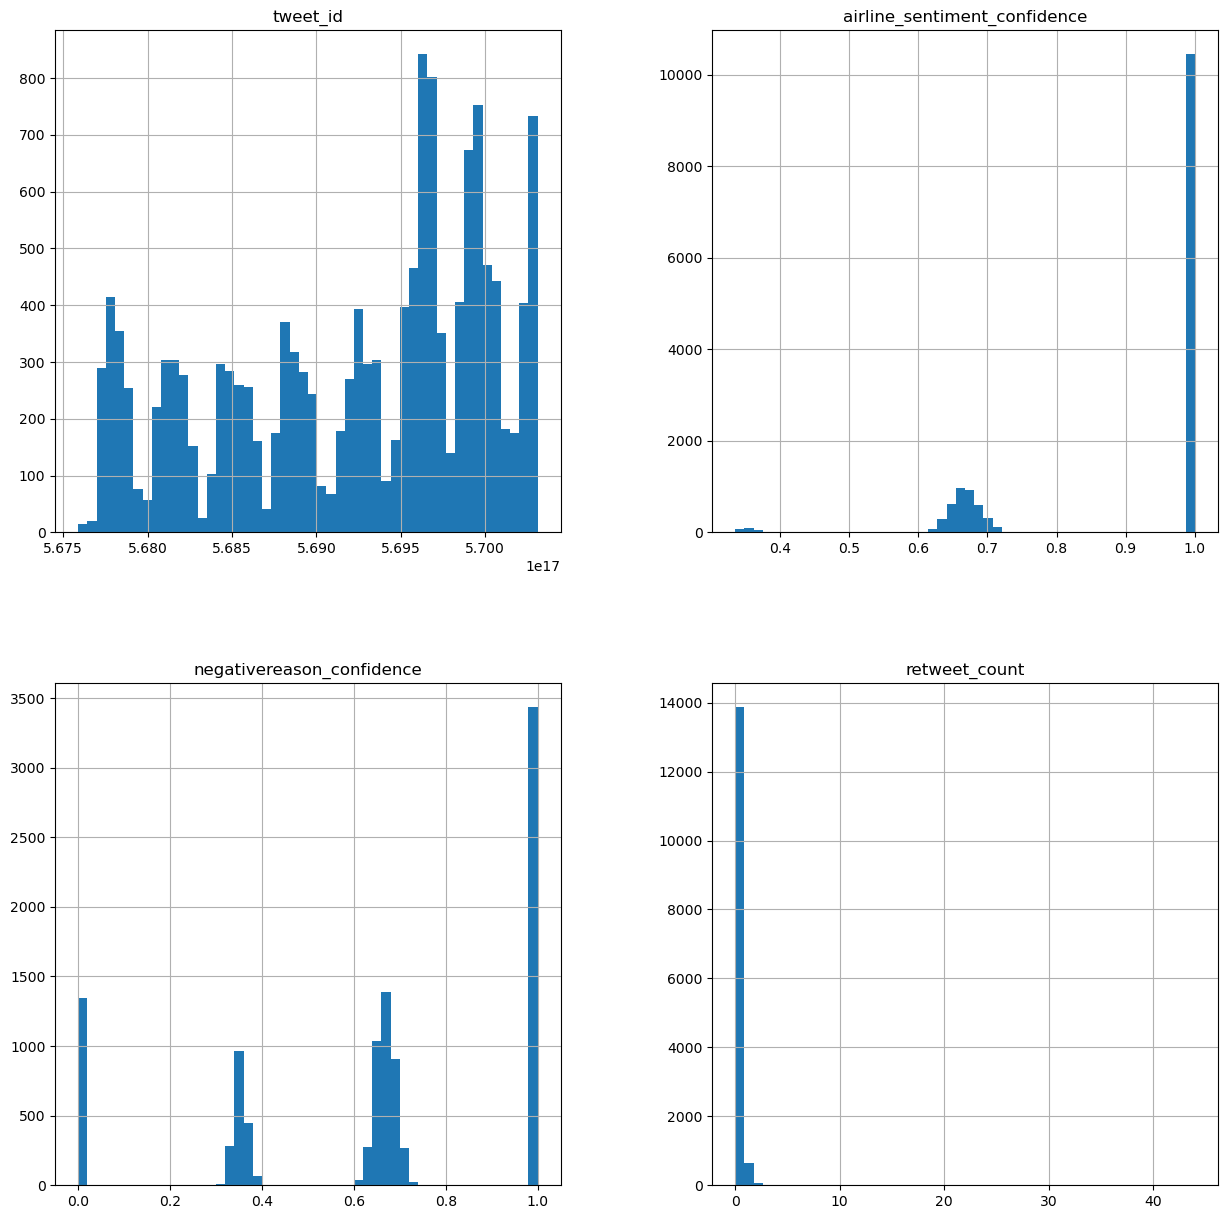

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.hist(bins=50,figsize=(15,15))

                 tweet_id  airline_sentiment_confidence  \
0      570306133677760513                        1.0000   
1      570301130888122368                        0.3486   
2      570301083672813571                        0.6837   
3      570301031407624196                        1.0000   
4      570300817074462722                        1.0000   
...                   ...                           ...   
14635  569587686496825344                        0.3487   
14636  569587371693355008                        1.0000   
14637  569587242672398336                        1.0000   
14638  569587188687634433                        1.0000   
14639  569587140490866689                        0.6771   

       negativereason_confidence  retweet_count  
0                         0.0000              0  
1                         0.0000              0  
2                         0.0000              0  
3                         0.7033              0  
4                         1.0000         

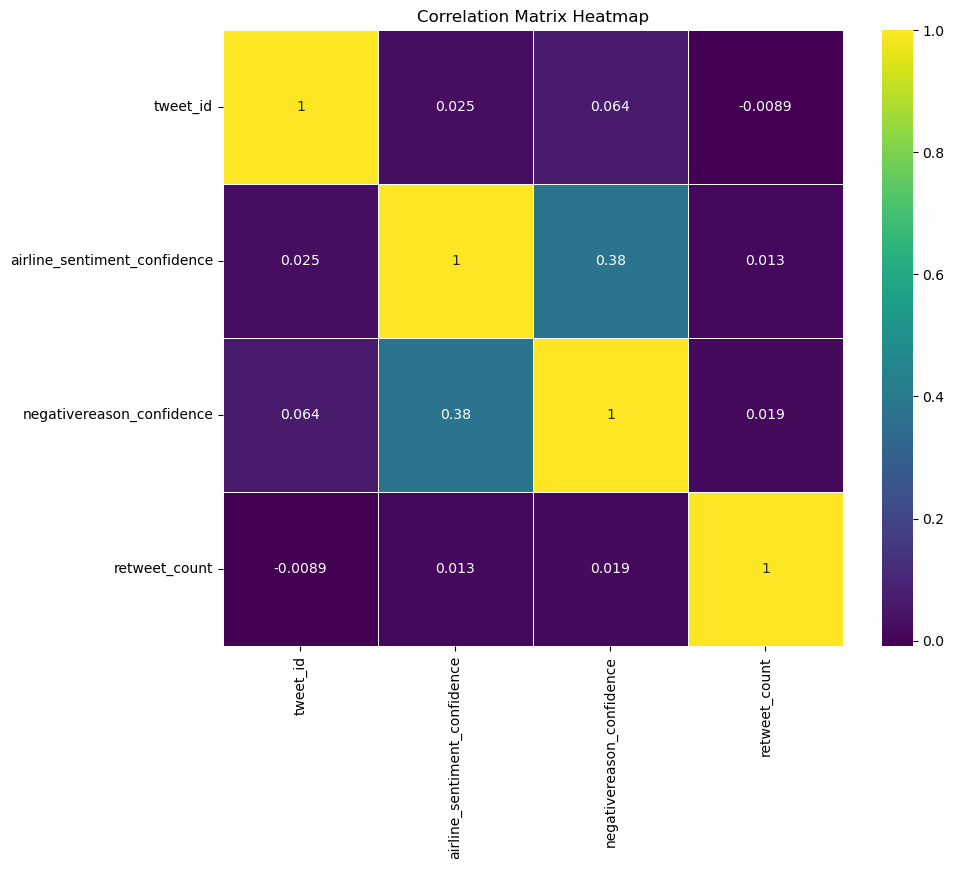

In [66]:
print(tweets_df.select_dtypes(include='number'))

correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


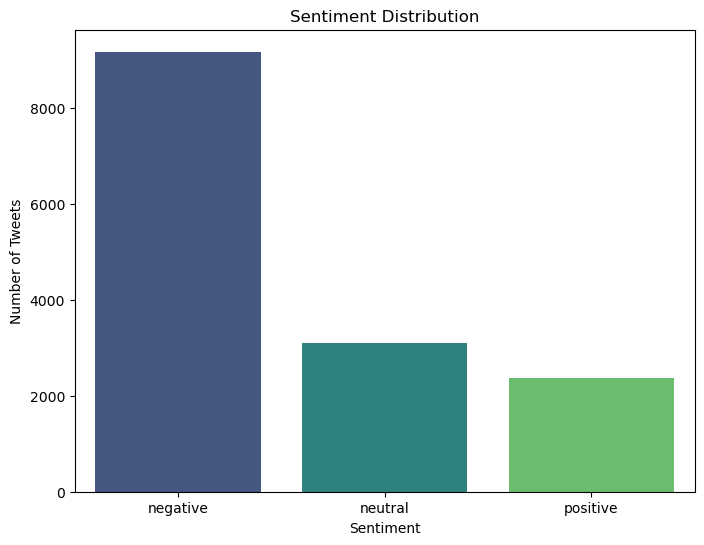

In [55]:
df.fillna({'negativereason': 'Unknown', 'negativereason_confidence': 0, 'tweet_coord': 'Unknown', 'tweet_location': 'Unknown', 'user_timezone': 'Unknown'}, inplace=True)


sentiment_counts = tweets_df['airline_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


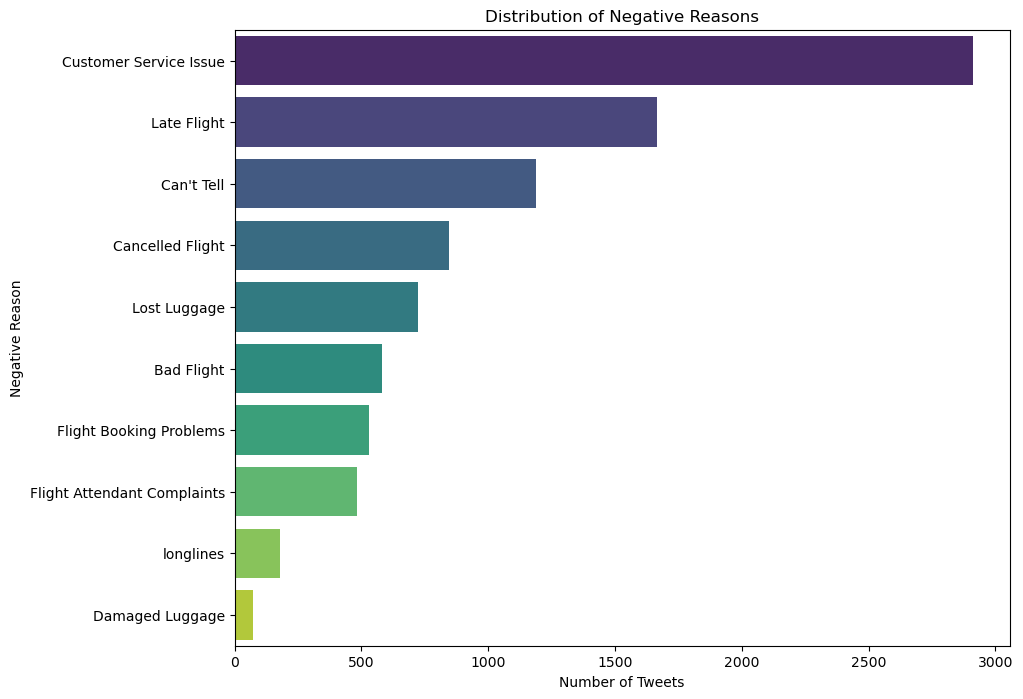

In [57]:
negativereason_counts = tweets_df[tweets_df['airline_sentiment'] == 'negative']['negativereason'].value_counts()

plt.figure(figsize=(10, 8))
sns.barplot(x=negativereason_counts.values, y=negativereason_counts.index, palette='viridis')
plt.title('Distribution of Negative Reasons')
plt.xlabel('Number of Tweets')
plt.ylabel('Negative Reason')
plt.show()



<Figure size 1200x800 with 0 Axes>

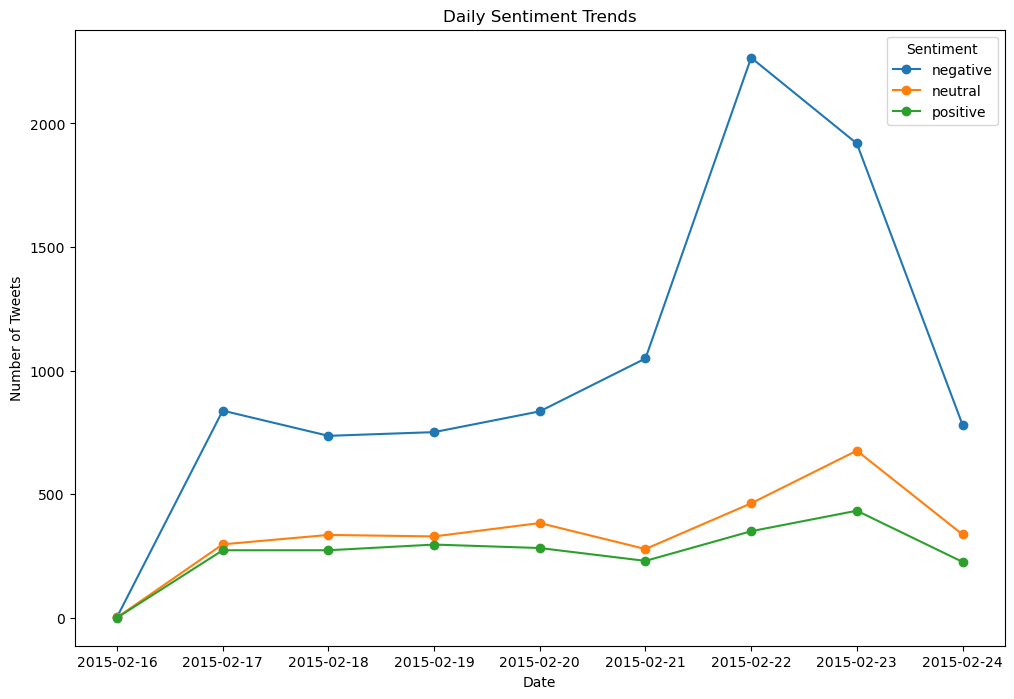

In [51]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

daily_sentiment = tweets_df.groupby([df['tweet_created'].dt.date, 'airline_sentiment']).size().unstack().fillna(0)

plt.figure(figsize=(12, 8))
daily_sentiment.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()

airline_sentiment      negative  neutral  positive
tweet_location                                    
Abu Dhabi                   0.0     12.0       0.0
Alexandria, VA              8.0      3.0       2.0
All Over The World         10.0      2.0       2.0
Arlington, VA              25.0      2.0       0.0
Asheville, NC              20.0      1.0       1.0
Atlanta                     7.0      1.0       3.0
Atlanta, GA                11.0     11.0       3.0
Austin, TX                 42.0     11.0      11.0
Austin, Texas               3.0      5.0       7.0
BK                         15.0      3.0       4.0
BTR/DCA/IAD/MSY - etc      15.0      3.0       2.0
Baltimore, MD              11.0      4.0       1.0
Bay Area, CA               10.0      0.0       1.0
Belle MO                   23.0      0.0       0.0
Boston                     34.0     19.0       9.0
Boston, MA                103.0     35.0      19.0
Brooklyn                    9.0      7.0       7.0
Brooklyn, NY               47.0

<Figure size 1200x800 with 0 Axes>

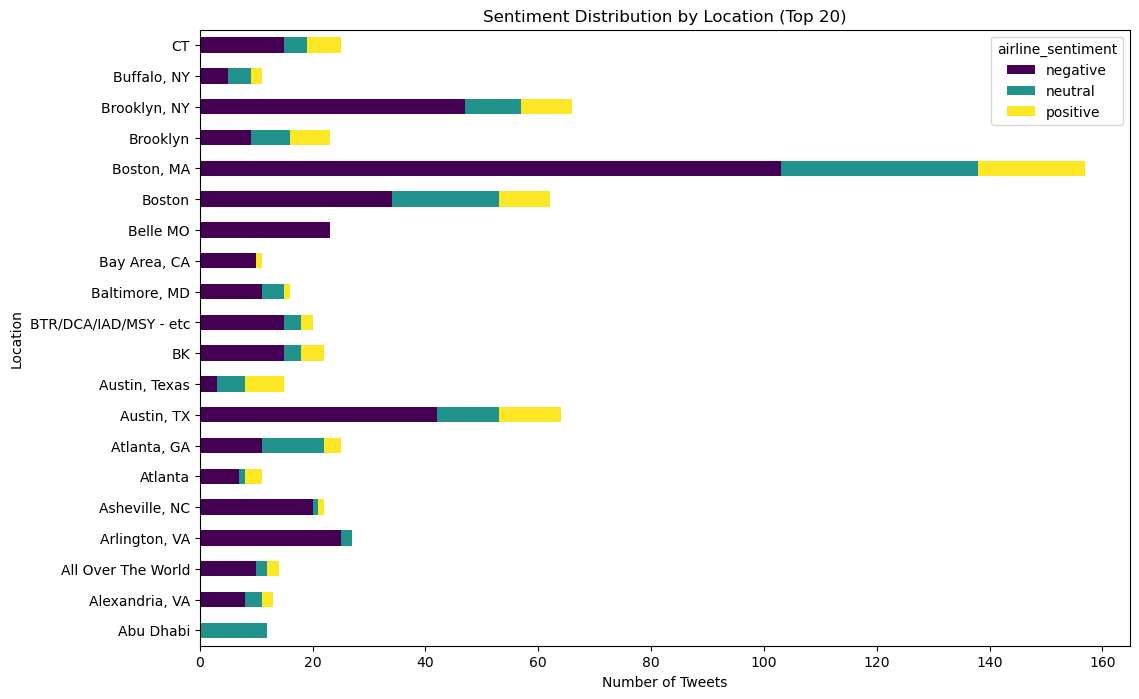

In [49]:
location_sentiment = tweets_df.groupby(['tweet_location', 'airline_sentiment']).size().unstack().fillna(0)

significant_locations = location_sentiment.sum(axis=1) > 10
location_sentiment = location_sentiment[significant_locations]

print(location_sentiment.head(20))

plt.figure(figsize=(12, 8))
location_sentiment.head(20).plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution by Location (Top 20)')
plt.xlabel('Number of Tweets')
plt.ylabel('Location')
plt.show()
